### Clustering & PCA Analysis HELP International NGO

#### Goal :

Provide insights on which countries are in dire need of the help from NGO
- Perform PCA on the dataset and obtain the new dataset with the Principal Components
- Perform Outlier Analysis
- Analyze the clusters and identify the ones which are in dire need of aid.


### Setp 1: Loading data into DataFrame

In [10]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [11]:
# Creating dataframe from the provided dataset

country_df = pd.read_csv('Country-data.csv')

# Creating copy of the dataframe
country_df_values = country_df
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
# Inspecting various aspects of the dataset
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [13]:
country_df.shape

(167, 10)

In [14]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [15]:
# Check for missing values. we find there are no missing values in the dataset
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [16]:
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [17]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Step 2 : Outliers Treatment

In [18]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

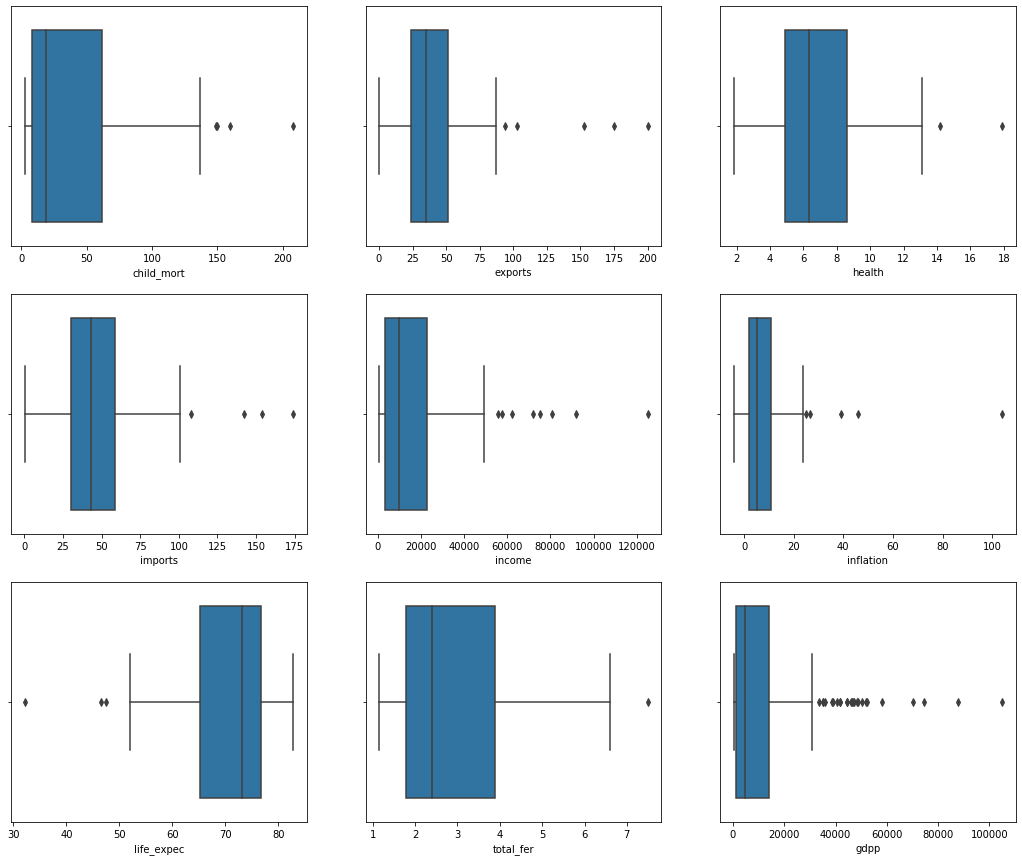

In [19]:
# Checking for outliers present in the dataset

plt.figure(figsize=(18,15))
vars= ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']
for i in enumerate(vars):
       plt.subplot(3,3,i[0]+1)
       sns.boxplot(x=i[1], data=country_df)
       

From the above plot, it is observed that there significant number of outliers present in `"GDPP"` and `"Income"` columns.These will manipulate the clustering process.
Hence opting to remove the outliers from both columns.

In [20]:
# Outlier treatment for GDPP column
## Taking the quatile values between 1% and 80% 

Q1= country_df['gdpp'].quantile(0.01)
Q4=country_df['gdpp'].quantile(0.80)
country_df_1= country_df[(country_df['gdpp']>=Q1) & (country_df['gdpp']<=Q4)]
country_df_1.shape

(131, 10)

After removing data above 80% quantile, the number of rows are reduced to `131` i.e. `36 rows` contatining outlier values are dropped.

Once again plotting boxplot to check the outlier status.

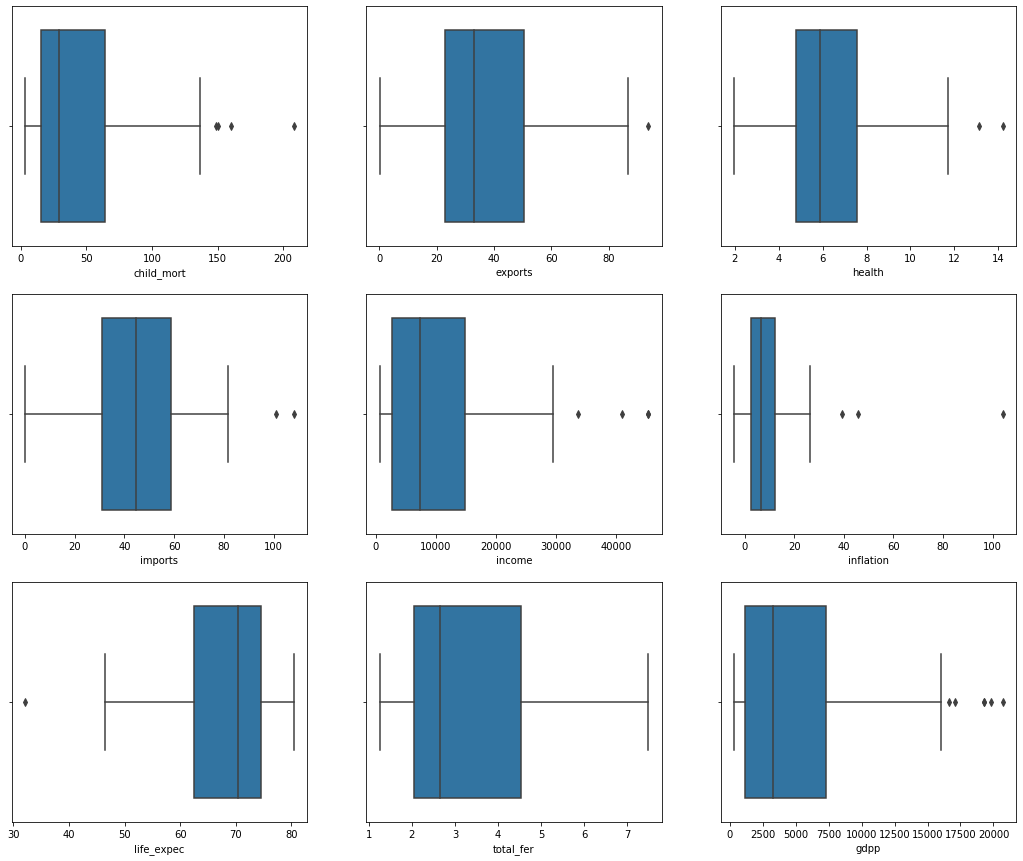

In [21]:
# Checking for outliers present in the dataset

plt.figure(figsize=(18,15))
vars= ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']
for i in enumerate(vars):
       plt.subplot(3,3,i[0]+1)
       sns.boxplot(x=i[1], data=country_df_1)
       

From the boxplot, it is clear that we have removed significant number of outliers from the `"GDPP"` column.

In [22]:
# Outlier treatment for Income column
## Taking the quatile values between 1% and 90% 

Q1= country_df['income'].quantile(0.01)
Q4=country_df['income'].quantile(0.90)
country_df_2= country_df_1[(country_df_1['income']>=Q1) & (country_df_1['income']<=Q4)]
country_df_2.shape

(128, 10)

The number of rows are reduced to "128" after outlier treatment on "Income"

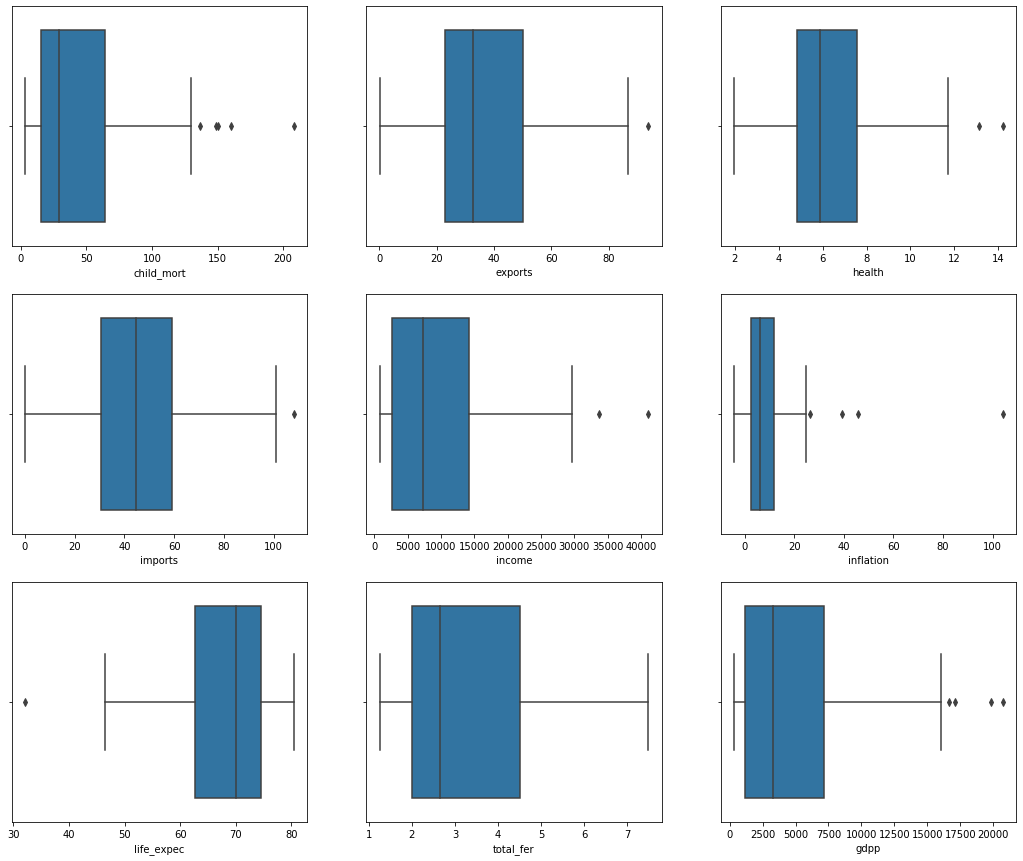

In [23]:
# Checking for outliers present in the dataset

plt.figure(figsize=(18,15))
vars= ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']
for i in enumerate(vars):
       plt.subplot(3,3,i[0]+1)
       sns.boxplot(x=i[1], data=country_df_2)
       

The data still has some "Outliers" present in the dataset. But they are withing range which will not impact the clusterisation.This is good data to apply PCA on.

### Step 3 : Applying PCA

#### Scaling the data before applying PCA

In [24]:
country_df_forHierarchical = country_df_2.copy()
country_df_2 = country_df_2.reset_index(drop=True)

In [25]:
### Removing "Country" column from the dataframe
country_df_2.reset_index()
countries_list_df= country_df_2.pop('country')
countries_list_df.reset_index(drop=True)
countries_list_df.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [26]:
## Scaling the data before applying PCA

scaler = StandardScaler()
country_df_scaled = country_df_2.copy()
country_df_scaled = scaler.fit_transform(country_df_scaled)
country_df_scaled[:5,:5]

array([[ 1.08609087, -1.36430399,  0.6037782 , -0.04939097, -0.99618769],
       [-0.72306198, -0.456601  ,  0.1455574 ,  0.14223964,  0.07347287],
       [-0.46004655,  0.06784962, -0.91324407, -0.74858371,  0.45531084],
       [ 1.79402024,  1.27307747, -1.50047849, -0.15297508, -0.44464396],
       [-0.87792153,  0.42588802, -0.08577738,  0.6756978 ,  1.25241366]])

#### Applying PCA

In [27]:
# Checking the current variance of each column in final dataset (country_df_2)
round(100*(country_df_2.var())/sum(country_df_2.var()),4)

child_mort     0.0020
exports        0.0005
health         0.0000
imports        0.0005
income        74.0070
inflation      0.0002
life_expec     0.0001
total_fer      0.0000
gdpp          25.9898
dtype: float64

In [28]:
# initializing PCA object
pca=PCA(svd_solver='randomized',random_state=42)

In [29]:
pca.fit(country_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [30]:
pca.components_

array([[-0.4291696 ,  0.29183495,  0.06477779,  0.15850847,  0.42319401,
        -0.12537776,  0.40243316, -0.41684983,  0.41327441],
       [-0.10198291, -0.31750933, -0.31896151, -0.69875747,  0.15776467,
         0.44799499,  0.23173927, -0.05707795,  0.12743106],
       [ 0.25928151,  0.56799609, -0.50992779,  0.15597753,  0.25168993,
         0.34298677, -0.22042217,  0.24232836,  0.19365302],
       [ 0.18859945, -0.04539307,  0.73462399, -0.0146345 ,  0.24616356,
         0.44813343, -0.19177332,  0.13535458,  0.32552296],
       [-0.28138164,  0.13227101,  0.05912306,  0.33172055, -0.32672384,
         0.6646743 ,  0.25253699, -0.15754817, -0.39071466],
       [ 0.11537886, -0.15071723, -0.11863878,  0.05694069,  0.06562984,
         0.10852259, -0.57437045, -0.77432536, -0.03300055],
       [ 0.02218689, -0.66253815, -0.27197268,  0.58634448,  0.12125165,
         0.10425033,  0.09299015,  0.16070405,  0.28764372],
       [ 0.78077117,  0.02934809,  0.03270498,  0.04247925, -0

In [31]:
pca.explained_variance_ratio_

array([0.4510976 , 0.16565771, 0.13888526, 0.10011146, 0.07636439,
       0.03125913, 0.02022004, 0.0113711 , 0.00503332])

Text(0, 0.5, 'Cumulative variance explained')

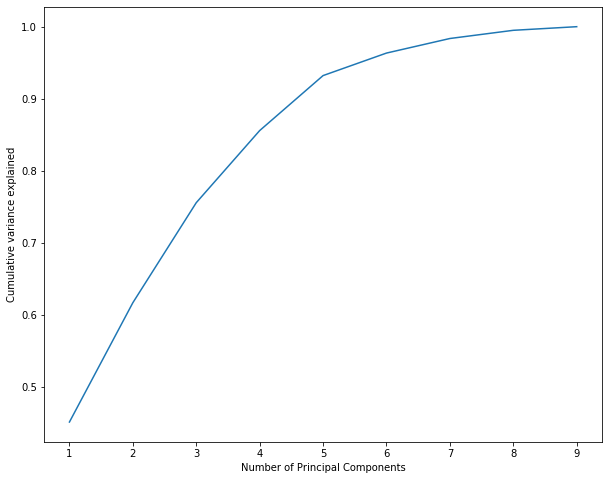

In [32]:
# Visualize the variance ratios viz a viz number of PCs to get a better understanding
cumulative_variance=np.cumsum(pca.explained_variance_ratio_)
# Scree Plot

fig = plt.figure(figsize = (10,8))
plt.plot(range(1,len(cumulative_variance)+1),cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative variance explained')


Looking at the plot, when number of principal components is 5 we get 95% variance explanation.

Hence, computing PCA after taking number of components as 5

In [33]:
pca_final=PCA(n_components=5,random_state=42)
PCA_df=pca_final.fit_transform(country_df_scaled)
PCA_df

array([[-2.96136075e+00, -5.28946820e-01, -4.81771348e-01,
         6.96992224e-01, -3.85601782e-01],
       [ 1.04269978e+00,  1.77282055e-01, -1.11258156e+00,
        -5.50550387e-01,  3.96007407e-01],
       [ 6.07629241e-01,  1.43021235e+00,  3.09403129e-01,
        -6.06020829e-01,  4.31738497e-01],
       [-2.19294472e+00,  8.16974044e-02,  2.86062037e+00,
        -3.82194316e-02,  1.40092801e-02],
       [ 2.58800796e+00, -9.98973377e-02,  1.58818964e-01,
        -2.33432264e-02, -5.65750958e-01],
       [ 1.33796601e+00,  2.24200496e+00, -8.33621091e-01,
         1.43003022e+00, -1.96788730e-01],
       [ 3.83660283e-01,  6.66464720e-01, -8.03334593e-01,
        -1.18805281e+00,  5.28651235e-01],
       [ 8.99572371e-01,  1.12833595e+00,  4.98718489e-01,
         1.70989763e-01, -1.91673043e-01],
       [ 4.70836710e+00,  8.53568867e-01,  2.28732030e+00,
         1.12758041e+00, -1.88136780e+00],
       [-1.00005322e+00,  1.35475160e+00, -8.11138597e-01,
        -1.51002788e+00

In [34]:
# Creating a Dataframe with chosen PCs for convenience
PCA_df=pd.DataFrame(PCA_df,columns=['PC1','PC2','PC3','PC4','PC5'])
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.961361,-0.528947,-0.481771,0.696992,-0.385602
1,1.042700,0.177282,-1.112582,-0.550550,0.396007
2,0.607629,1.430212,0.309403,-0.606021,0.431738
3,-2.192945,0.081697,2.860620,-0.038219,0.014009
4,2.588008,-0.099897,0.158819,-0.023343,-0.565751


In [35]:
PCA_df.shape

(128, 5)

In [36]:
# Add back the country column to this Dataframe
PCA_Final_df= pd.concat([PCA_df,countries_list_df],axis=1)
PCA_Final_df.reset_index()
PCA_Final_df.head(20)

,PC1,PC2,PC3,PC4,PC5,country
0,-2.961361,-0.528947,-0.481771,0.696992,-0.385602,Afghanistan
1,1.042700,0.177282,-1.112582,-0.550550,0.396007,Albania
2,0.607629,1.430212,0.309403,-0.606021,0.431738,Algeria
3,-2.192945,0.081697,2.860620,-0.038219,0.014009,Angola
4,2.588008,-0.099897,0.158819,-0.023343,-0.565751,Antigua and Barbuda
5,1.337966,2.242005,-0.833621,1.430030,-0.196789,Argentina
6,0.383660,0.666465,-0.803335,-1.188053,0.528651,Armenia
7,0.899572,1.128336,0.498718,0.170990,-0.191673,Azerbaijan
8,4.708367,0.853569,2.287320,1.127580,-1.881368,Bahrain
9,-1.000053,1.354752,-0.811139,-1.510028,0.048004,Bangladesh


<Figure size 720x720 with 0 Axes>

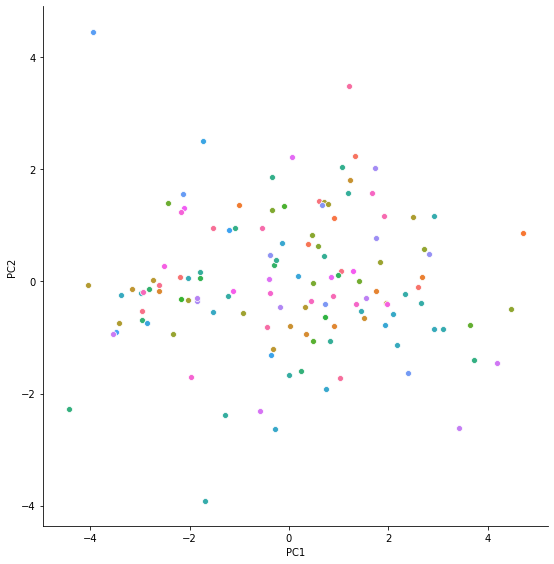

In [37]:
#Plotting the data
plt.figure(figsize=(10,10))
plt1 = sns.pairplot(data=PCA_Final_df,x_vars=['PC1'], y_vars=['PC2'],hue='country', size=8)
plt1._legend.remove()

<Figure size 720x720 with 0 Axes>

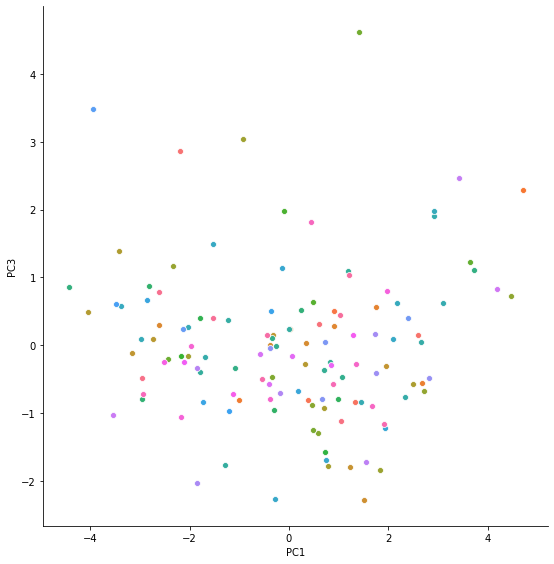

In [38]:
#Plotting the data
plt.figure(figsize=(10,10))
plt2 = sns.pairplot(data=PCA_Final_df,x_vars=['PC1'], y_vars=['PC3'],hue='country', size=8)
plt2._legend.remove()

<Figure size 576x720 with 0 Axes>

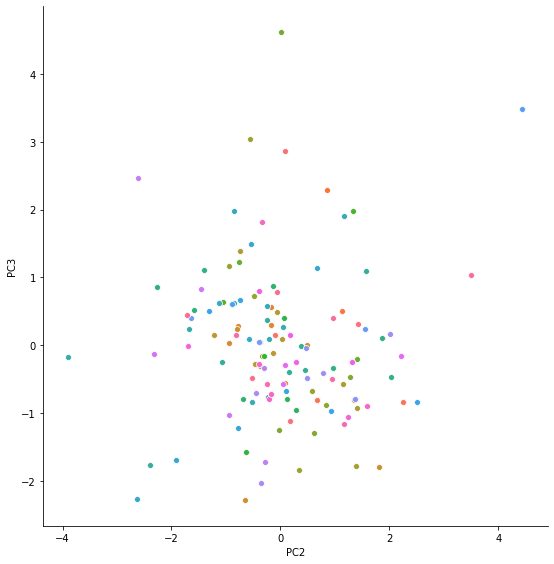

In [39]:
#Plotting the data
plt.figure(figsize=(8,10))
plt3 = sns.pairplot(data=PCA_Final_df,x_vars=['PC2'], y_vars=['PC3'],hue='country', size = 8)
plt3._legend.remove()

The above visualizations between PC1, PPC2, PC3 suggest that the data can be clustered.

For further confirmation "Hopkins Score" can be used. A good Hopkins Score means data can be clustered.

### Step 4 : Clustering

In [40]:
PCA_Final_df.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.961361,-0.528947,-0.481771,0.696992,-0.385602,Afghanistan
1,1.042700,0.177282,-1.112582,-0.550550,0.396007,Albania
2,0.607629,1.430212,0.309403,-0.606021,0.431738,Algeria
3,-2.192945,0.081697,2.860620,-0.038219,0.014009,Angola
4,2.588008,-0.099897,0.158819,-0.023343,-0.565751,Antigua and Barbuda


In [41]:
PCA_Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
PC1        128 non-null float64
PC2        128 non-null float64
PC3        128 non-null float64
PC4        128 non-null float64
PC5        128 non-null float64
country    128 non-null object
dtypes: float64(5), object(1)
memory usage: 6.1+ KB


In [42]:
PCA_Final2_df = PCA_Final_df.drop('country', axis = 1)

In [43]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [44]:
hopkins(PCA_Final2_df)

0.7736965750735142

#### K- means Clustering

#### Looking at the silhouette score plot and choosing the optimal number of cluster

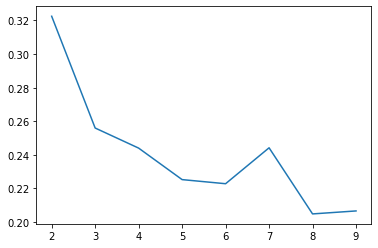

In [45]:
sscore = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(PCA_Final2_df)
    sscore.append([k, silhouette_score(PCA_Final2_df, kmeans.labels_)])
plt.plot(pd.DataFrame(sscore)[0], pd.DataFrame(sscore)[1])

#### Looking at the Elbow Curve plot and choosing the optimal number of cluster

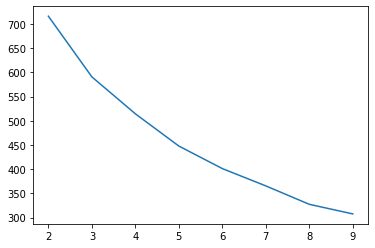

In [46]:
ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(PCA_Final2_df)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

#### KMeans with predefined k value:

As observed from `silhouette score plot` and `Elbow Curve`, optimal number of clusters is 3.

In `silhouette score plot`, average max value is at 3 and in `Elbow Curve`, we have a elbow at 3. Hence running KMeans with n = 3

In [47]:
model_kmean = KMeans(n_clusters = 3, random_state = 42)
model_kmean.fit(PCA_Final2_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [48]:
Country_clustered_df = pd.concat([PCA_Final_df.reset_index().drop('index', axis = 1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis  =1)], axis = 1)
Country_clustered_df.columns = ['PC1', 'PC2','PC3', 'PC4', 'PC5','country', 'ClusterID']
Country_clustered_df.head()

,PC1,PC2,PC3,PC4,PC5,country,ClusterID
0,-2.961361,-0.528947,-0.481771,0.696992,-0.385602,Afghanistan,0
1,1.042700,0.177282,-1.112582,-0.550550,0.396007,Albania,2
2,0.607629,1.430212,0.309403,-0.606021,0.431738,Algeria,2
3,-2.192945,0.081697,2.860620,-0.038219,0.014009,Angola,0
4,2.588008,-0.099897,0.158819,-0.023343,-0.565751,Antigua and Barbuda,1


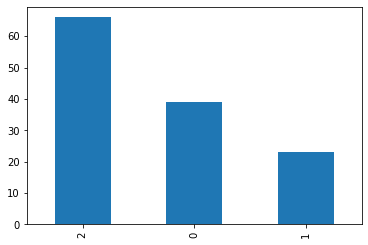

In [49]:
# Check the count of observation per cluster
Country_clustered_df['ClusterID'].value_counts().plot(kind = 'bar')

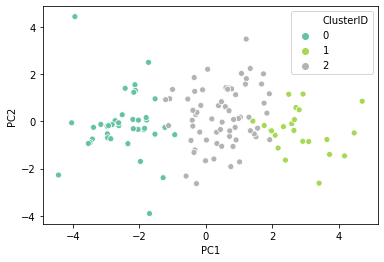

In [50]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'ClusterID', data = Country_clustered_df, palette='Set2')

#### Hierarchical Clustering 

In [51]:
country_df_scaled[:5,:5]

array([[ 1.08609087, -1.36430399,  0.6037782 , -0.04939097, -0.99618769],
       [-0.72306198, -0.456601  ,  0.1455574 ,  0.14223964,  0.07347287],
       [-0.46004655,  0.06784962, -0.91324407, -0.74858371,  0.45531084],
       [ 1.79402024,  1.27307747, -1.50047849, -0.15297508, -0.44464396],
       [-0.87792153,  0.42588802, -0.08577738,  0.6756978 ,  1.25241366]])

##### Single Linkage

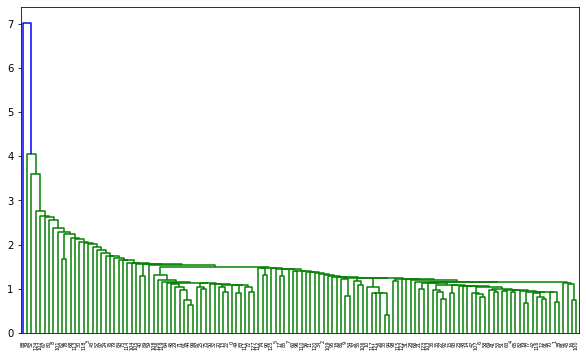

In [52]:
plt.figure(figsize=(10,6))
singleLinkageClustering = linkage(country_df_scaled, method = 'single', metric = 'euclidean')
dendrogram(singleLinkageClustering)
plt.show()

#### Complete Linkage

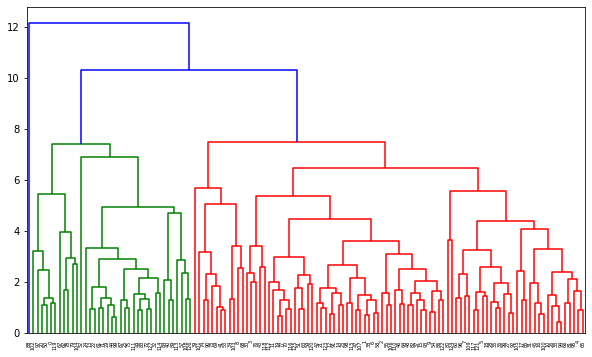

In [53]:
plt.figure(figsize=(10,6))
completeLinkageClustering = linkage(country_df_scaled, method = 'complete', metric = 'euclidean')
dendrogram(completeLinkageClustering)
plt.show()

From the above dendrogram, it can be observed that 2,3,or 5 clusters.

Taking the number of clusters as 3

In [54]:
clusterLabels = cut_tree(completeLinkageClustering,n_clusters=3).reshape(-1,)
clusterLabels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [55]:
## Assigning cluster labels

country_df_forHierarchical['ClusterId'] = clusterLabels
country_df_forHierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


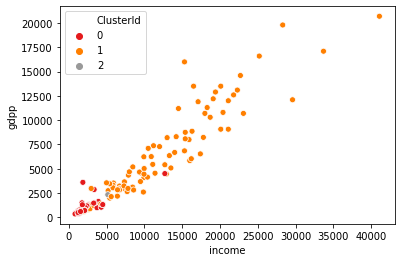

In [56]:
# Observe the scatter plot for "GDPP" and "Income" columns
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'ClusterId', data = country_df_forHierarchical, palette='Set1')

From this visualization, we can say that the clusters formed using KMeans are providing more informative than Hierarchical Method.

Hence, opting for clusters formed using KMeans Algorithm.

### Step 5 : Cluster Analysis

In [57]:
## Merging the cluster id with original df

clustered_Original_Country_Df = pd.merge(country_df, Country_clustered_df[['ClusterID','country']], on = 'country')

In [58]:
clustered_Original_Country_Df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2
7,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,2
8,Bahrain,8.6,69.5,4.97,50.9,41100,7.44,76.0,2.16,20700,1
9,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758,2


In [59]:
clustered_Original_Country_Df.shape

(128, 11)

In [60]:
## Taking the desired variables only

analysable_DF = clustered_Original_Country_Df[['gdpp','child_mort','income','ClusterID', 'country']]
analysable_DF.head()

,gdpp,child_mort,income,ClusterID,country
0,553,90.2,1610,0,Afghanistan
1,4090,16.6,9930,2,Albania
2,4460,27.3,12900,2,Algeria
3,3530,119.0,5900,0,Angola
4,12200,10.3,19100,1,Antigua and Barbuda


In [61]:
analysable_DF.groupby('ClusterID').mean()

,gdpp,child_mort,income
ClusterID,,,
0,1058.410256,96.433333,2343.076923
1,11928.695652,14.234783,20982.608696
2,4684.606061,27.298485,9453.181818


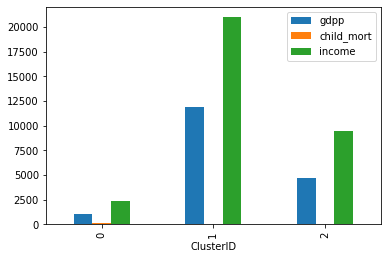

In [62]:
analysable_DF.groupby('ClusterID').mean().plot(kind = 'bar')

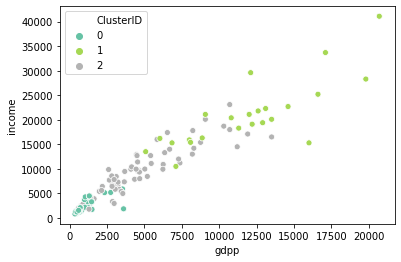

In [63]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'ClusterID', data = analysable_DF, palette='Set2')

From the above graph, we can clearly see that
- Cluster 0 is for Under Developed Countries.
- Cluster 1 is made up of Developed Countries as their GDPP and Income is high, while child mortality rate is very low.
- Cluster 2 is for  Developing Countries.

As observed in this observation, we can see that GDPP and Income is very high for Cluster 0 which is made up of Developed Countries.

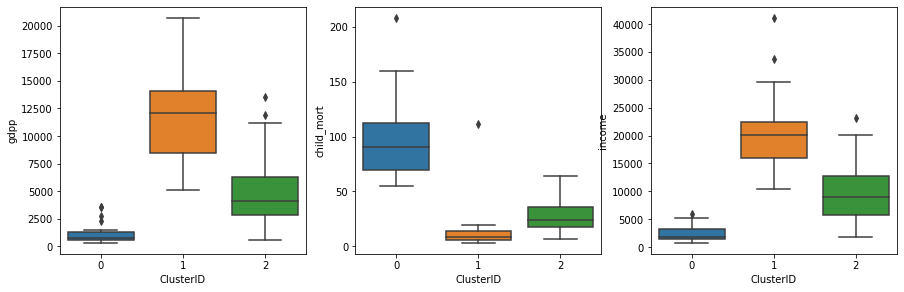

In [64]:
# Check outliers
plt.figure(figsize = (15,10))
var = ['gdpp', 'child_mort','income']
for i in enumerate(var):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = analysable_DF)

### Cluster 0 - Under Developing Countries Analysis

In [65]:
## Filtering out cluster 0 
analysable_DF_cluster0 = analysable_DF[analysable_DF['ClusterID']==0]
analysable_DF_cluster0.head()

,gdpp,child_mort,income,ClusterID,country
0,553,90.2,1610,0,Afghanistan
3,3530,119.0,5900,0,Angola
13,758,111.0,1820,0,Benin
20,575,116.0,1430,0,Burkina Faso
22,1310,108.0,2660,0,Cameroon


To find the countries those are in dire need of help
- Will have low GDPP
- Will have high child mortality rate
- Will have low income

Hence, we can filter the dataset according to the above conditions.

In [66]:
top_countries =analysable_DF_cluster0.sort_values(['gdpp','income','child_mort'], ascending=[True, True, False]).head(7)
top_countries

,gdpp,child_mort,income,ClusterID,country
87,348,123.0,814,0,Niger
102,399,160.0,1220,0,Sierra Leone
71,413,62.2,1390,0,Madagascar
83,419,101.0,918,0,Mozambique
24,446,149.0,888,0,Central African Republic
72,459,90.5,1030,0,Malawi
40,482,55.2,1420,0,Eritrea


<Figure size 720x432 with 0 Axes>

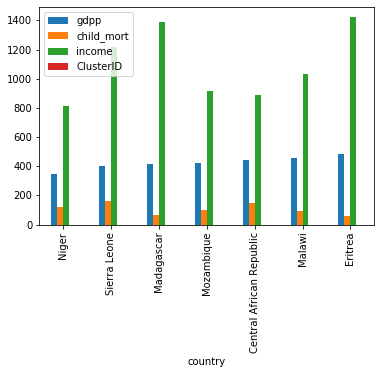

In [67]:
plt.figure(figsize=(10,6))
top_countries.plot(kind = 'bar', x = 'country')

The top 5 Countries those needs to be provided aid are :
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic